In [11]:
from ROOT import TCanvas
from ROOT import TH1F
from ROOT import gStyle
from array import array
import math
import numpy as np
import random
import time

c1 = TCanvas( 'c1', 'Random Number Generator', 0, 0, 1200, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(2,1)

c2 = TCanvas( 'c2', 'Random Number Generator Zoom', 0, 0, 1200, 1000 )
c2.SetGridx()
c2.SetGridy()
c2.GetFrame().SetFillColor( 21 )
c2.GetFrame().SetBorderMode(-1 )
c2.GetFrame().SetBorderSize( 5 )
c2.Divide(2,1)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


In [12]:
def seedLCG(initVal):
    global rand
    rand = initVal
    
def rand_ejb():
    #a = 16807        # Apple CarbonLib, 
                     # C++11's minstd_rand0,
                     # MATLAB's v4 legacy generator mcg1680
    #m = 2147483647   # m = 2^31 - 1
            
    a = 2480367069   # a = 0x93d765dd from https://arxiv.org/pdf/2001.05304.pdf
    m = 4294967296   # m = 2^32
    
    b = 0
    global rand
    
    rand = (a*rand + b) % m
    return rand/m

In [13]:
npoints = 1000000
centroid = 0
sigma = 1
iseed = 1
nbins = 1000
width = 12.0*sigma
dx = width/nbins
n_randoms = 0

gStyle.SetOptFit(1)

factor = 4800.0

seedLCG(iseed)
h1 = TH1F("h1","Random Number Generation",nbins,centroid-width/2.0,centroid+width/2.0)
h2 = TH1F("h2","Random Number Generation",nbins,centroid+width/12.0,centroid+width/12.0+width/factor)
h3 = TH1F("h3","Random Number Generation",nbins,centroid-width/2.0,centroid+width/2.0)
h4 = TH1F("h4","Random Number Generation",nbins,centroid+width/12.0,centroid+width/12.0+width/factor)

random.seed(iseed)

ticks1 = time.time()
for i in range(0,npoints):
    check = True
    while (check):
        r1 = rand_ejb()
        n_randoms = n_randoms + 1
        x = (centroid-width/2.0+width*r1)
        pgauss = math.exp(-1.0*(x-centroid)*(x-centroid)/(2.0*sigma*sigma))
        r2 = rand_ejb()
        n_randoms = n_randoms+1
        if (r2<pgauss):
            check = False
            
    #print (i,r)
    h1.Fill(x,1.0/width/math.sqrt(2.0*3.14159265*sigma*sigma))
    h2.Fill(x,12.0/width/math.sqrt(2.0*3.14159265*sigma*sigma))
    
ticks2 = time.time()
print ('elapsed time = %.3f' % (ticks2-ticks1))
    
ticks3 = time.time()
for i in range(0,npoints):
    xp = random.gauss(centroid,sigma)
    h3.Fill(xp,1.0/width/math.sqrt(2.0*3.14159265*sigma*sigma))
    h4.Fill(xp,12.0/width/math.sqrt(2.0*3.14159265*sigma*sigma))
ticks4 = time.time()

print ('elapsed time = %.3f' % (ticks4-ticks3))

elapsed time = 7.407
elapsed time = 7.407
elapsed time = 2.689
elapsed time = 2.689


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h4 (Potential memory leak).


Total number of randoms generated = 9566062
Uncertainty in the mean = 0.001000
 FCN=687.325 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=6.51681e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.59316e+02   1.95140e-01   2.04153e-03   2.74828e-05
   2  Mean        -8.76456e-06   9.98984e-04   1.27975e-05   3.58454e-02
   3  Sigma        9.98378e-01   7.06134e-04   2.46450e-06   1.85747e-02
 FCN=732.725 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=6.39067e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.59225e+02   1.94681e-01   2.10664e-03   1.94890e-04
   2  Mean        -1.46308e

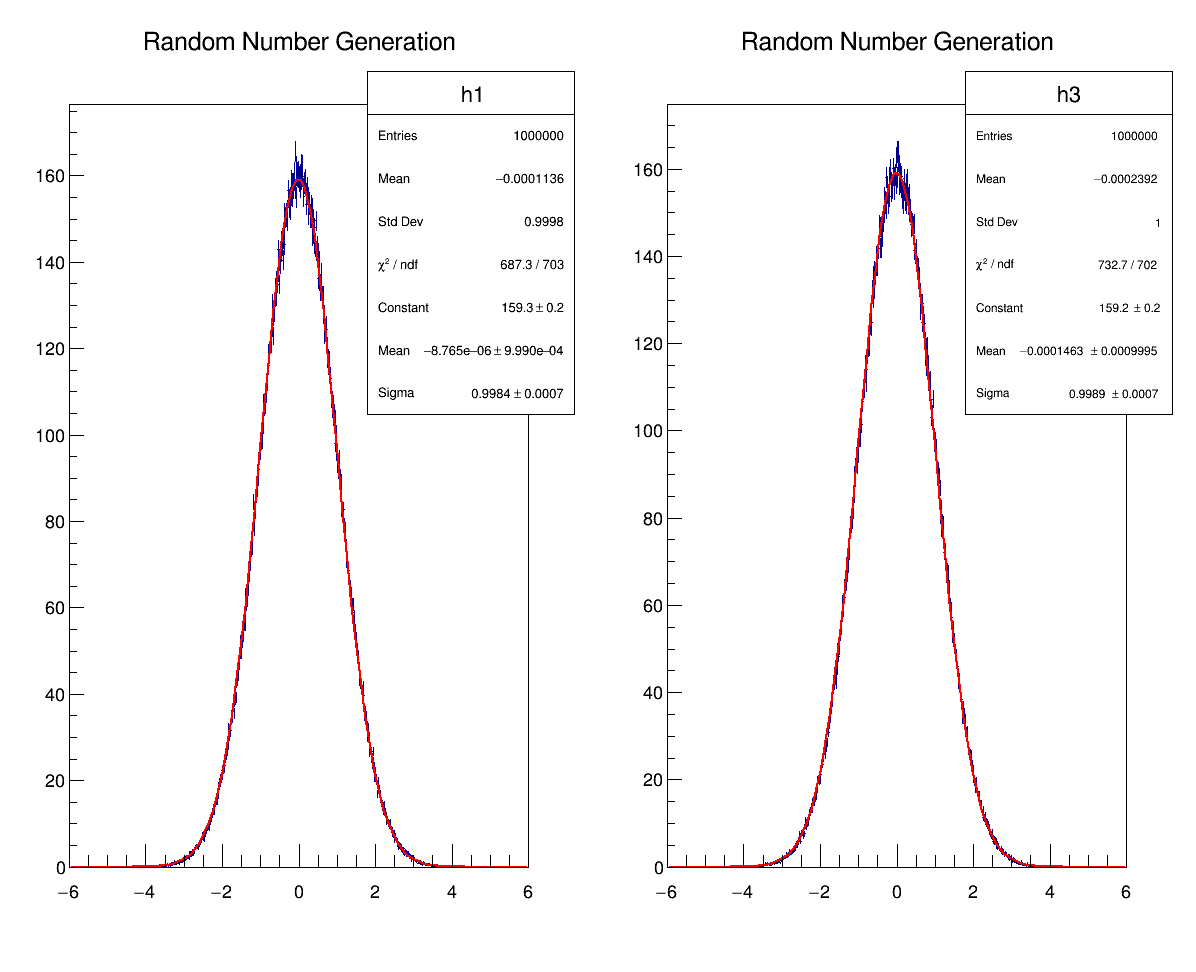

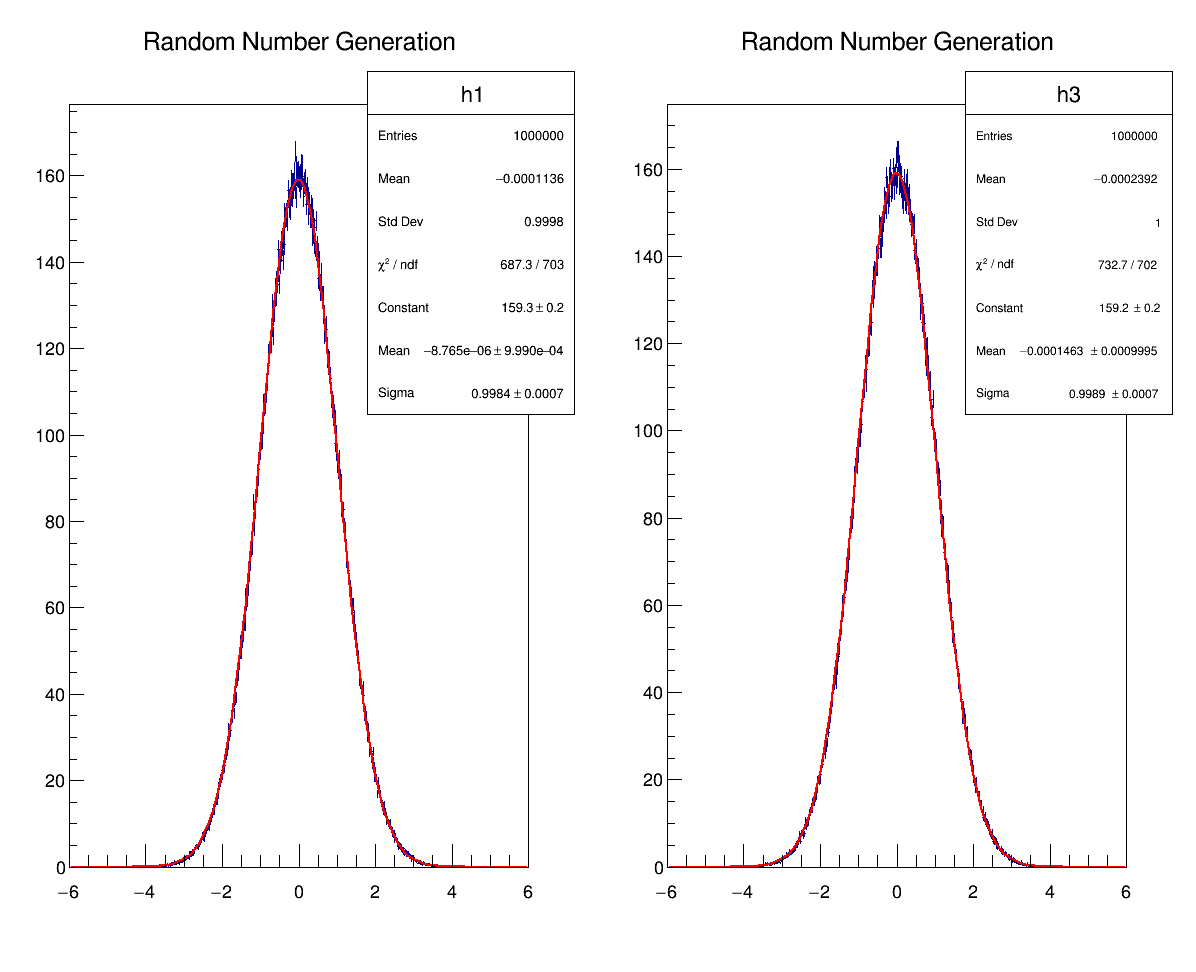

In [14]:
print("Total number of randoms generated = %d" % n_randoms)
print("Uncertainty in the mean = %f" % (sigma/math.sqrt(npoints)))

c1.cd(1)
h1.Fit("gaus")
h1.Draw()
c1.cd(2)
h3.Fit("gaus")
h3.Draw()
c1.Draw()

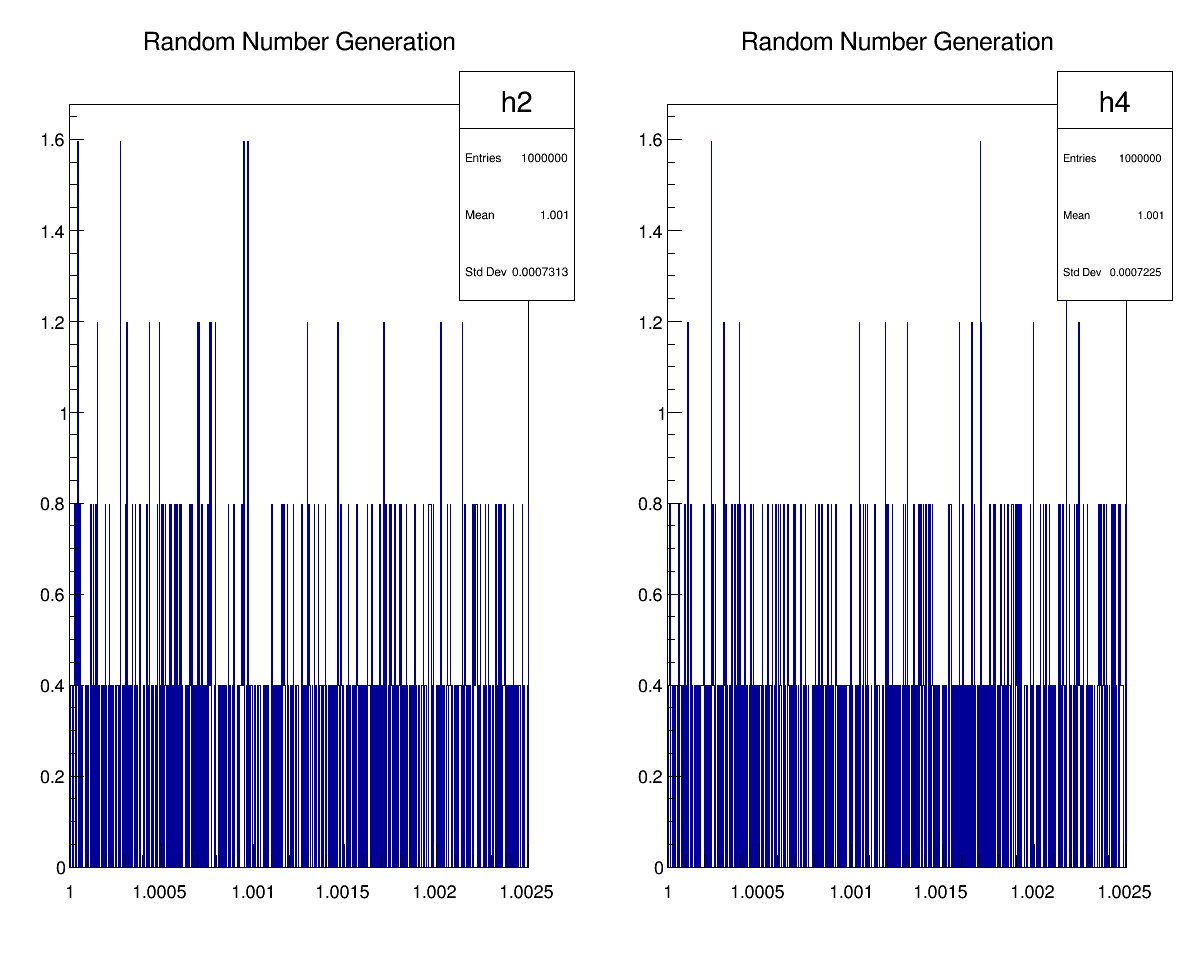

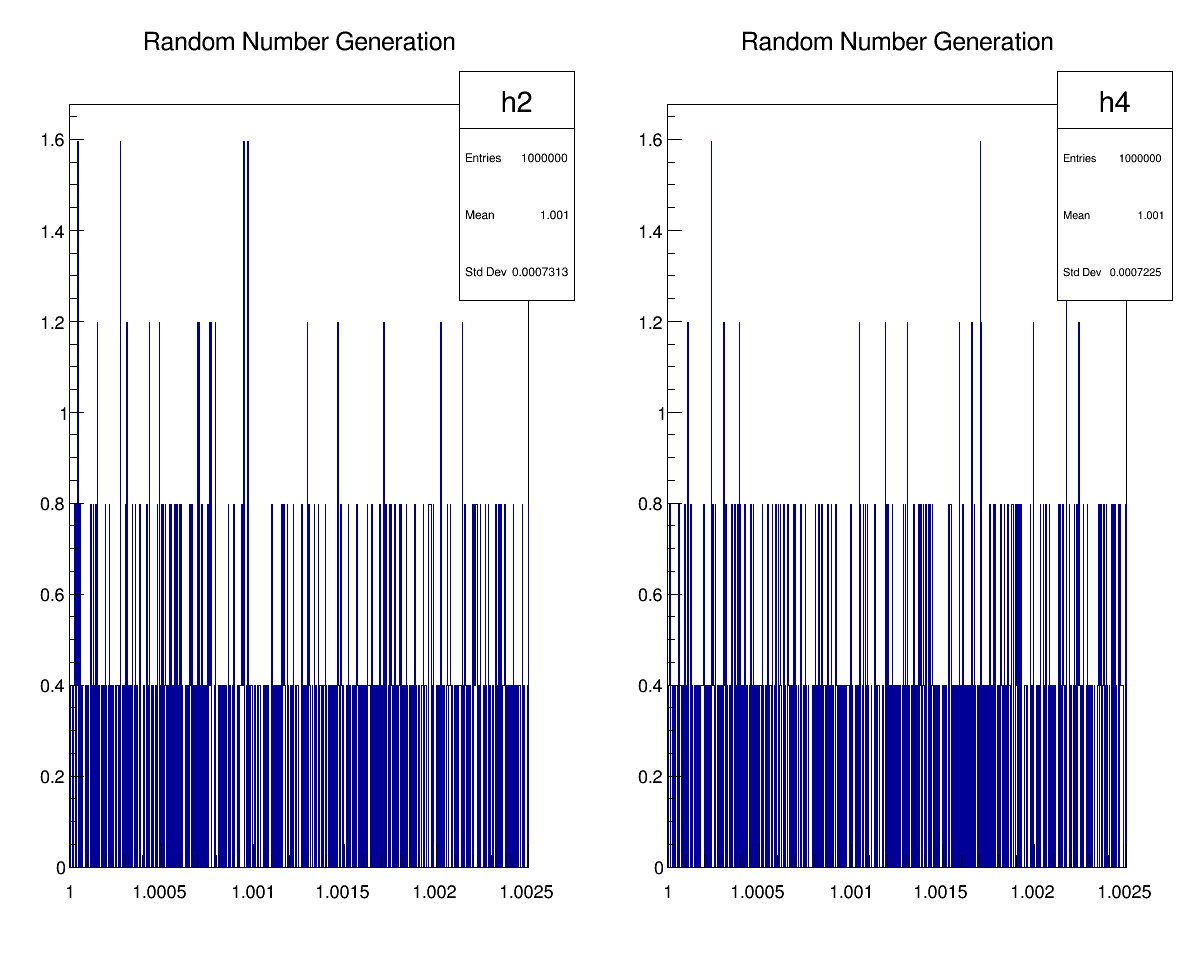

In [15]:
c2.cd(1)
h2.Draw("HIST")
c2.cd(2)
h4.Draw("HIST")
c2.Draw()